In [235]:
import hhgen.io as io
import hhgen.utils as utils
import matplotlib.pyplot as plt
import numpy as np

In [236]:
files = ! ls /t3home/musella/Analysis/HH_8_0_28/src/HHbbgg_ETH/Flashgg/work/gen_analysis/*madgraph.root

In [237]:
reload(io)
def get_data(fname,proc):
    tdir = 'genDiphotonDumper/trees'

    untagged = tdir+'/'+proc+'_13TeV_NoTag_0'
    tagged = tdir+'/'+proc+'_13TeV_DoubleHTag_%d'

    return io.read_trees(fname,untagged,tagged,12) #what is tagged and untagged? what is 12?

In [238]:
#hgg=H to 2 photons
#hbb=H to 2 b jets
#hh=H to 2 Higgs
reload(utils)
def calc_features(df):
    for part in "leadPho","subleadPho","leadJet","subleadJet":
        utils.calc_p4extra(df,part) #calculating pt, eta, phi, m for each 
    utils.calc_sump4(df,"hgg","leadPho","subleadPho") #calculating pt, eta, phi, m for sum of 2 photons
    utils.calc_sump4(df,"hbb","leadJet","subleadJet") #calculating pt, eta, phi, m for sum of 2 b jets
    utils.calc_sump4(df,"hh","hbb","hgg") #calculating pt, eta, phi, m for sum of 2 Higgs
    
    df["hh_delta_eta"] = df["hgg_eta"] - df["hbb_eta"] #difference in eta
    
    df["mtilda_x"]=df["hh_m"]-df["mgg"]-df["mbb"]+250.0 
    df["hgg_pt_hh_m"]=df["hgg_pt"]/df["hh_m"]
    df["hbb_pt_hh_m"]=df["hbb_pt"]/df["hh_m"]
    
    utils.calc_cos_theta(df,"bb")
    utils.calc_cos_theta(df,"gg")
    utils.calc_cos_theta_cs(df)
    

In [239]:
import os

dfs = {}
for ifil in files:
    fname = os.path.basename(ifil) #output_GluGluToHHTo2B2G_node_10_13TeV-madgraph.root
    proc = fname.replace("output_","").replace(".root","").replace("-","_") #GluGluToHHTo2B2G_node_10_13TeV_madgraph
    df = get_data(ifil,proc)
    proc = proc.replace("GluGluToHHTo2B2G_","").replace("_13TeV_madgraph","")#node_10
    calc_features(df)
    dfs[proc] = df

In [240]:
dfs["node_SM"].columns

Index([u'candidate_id', u'weight', u'mgg', u'mbb', u'leadPho_px',
       u'leadPho_py', u'leadPho_pz', u'leadPho_e', u'subleadPho_px',
       u'subleadPho_py', u'subleadPho_pz', u'subleadPho_e', u'leadJet_px',
       u'leadJet_py', u'leadJet_pz', u'leadJet_e', u'subleadJet_px',
       u'subleadJet_py', u'subleadJet_pz', u'subleadJet_e', u'rho', u'nvtx',
       u'event', u'lumi', u'processIndex', u'run', u'npu', u'puweight', u'cat',
       u'leadPho_pt', u'leadPho_eta', u'leadPho_phi', u'leadPho_m',
       u'subleadPho_pt', u'subleadPho_eta', u'subleadPho_phi', u'subleadPho_m',
       u'leadJet_pt', u'leadJet_eta', u'leadJet_phi', u'leadJet_m',
       u'subleadJet_pt', u'subleadJet_eta', u'subleadJet_phi', u'subleadJet_m',
       u'hgg_px', u'hgg_py', u'hgg_pz', u'hgg_e', u'hgg_pt', u'hgg_eta',
       u'hgg_phi', u'hgg_m', u'hbb_px', u'hbb_py', u'hbb_pz', u'hbb_e',
       u'hbb_pt', u'hbb_eta', u'hbb_phi', u'hbb_m', u'hh_px', u'hh_py',
       u'hh_pz', u'hh_e', u'hh_pt', u'hh_eta', u'hh

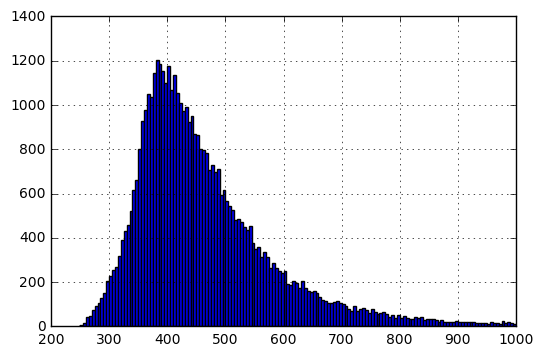

In [241]:
dfs["node_SM"].hh_m.hist(range=[250,1000],bins=150)
plt.show()

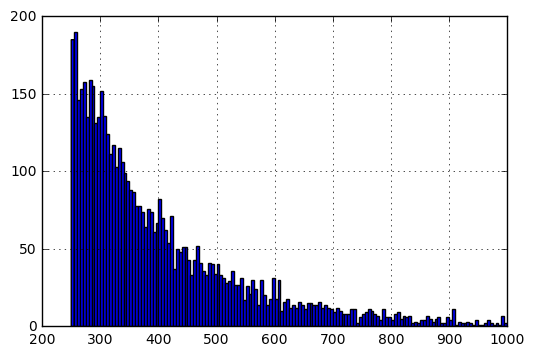

In [242]:
dfs["node_SM"].hh_pt.hist(range=[250,1000],bins=150)
plt.show()

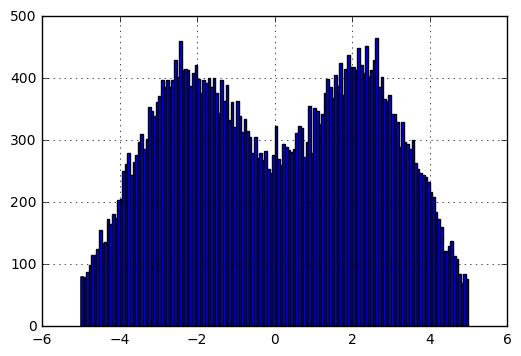

In [243]:
dfs["node_SM"].hh_eta.hist(range=[-5,5],bins=150)
plt.show()

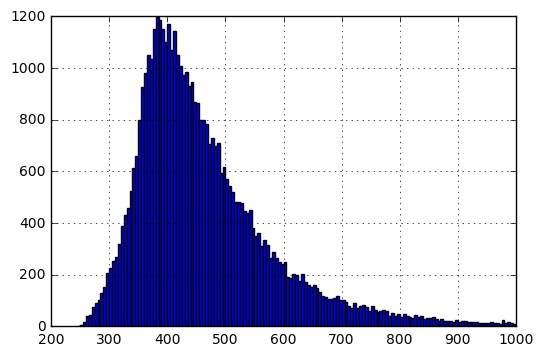

In [244]:
dfs["node_SM"].mtilda_x.hist(range=[250,1000],bins=150)
plt.show()

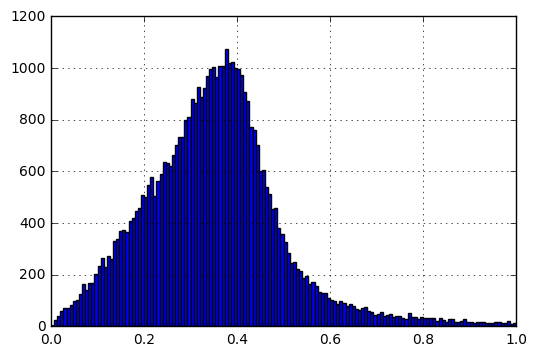

In [245]:
dfs["node_SM"].hgg_pt_hh_m.hist(range=[0,1],bins=150)
plt.show()

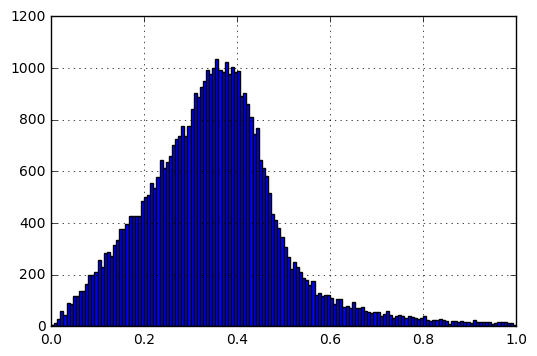

In [246]:
dfs["node_SM"].hbb_pt_hh_m.hist(range=[0,1],bins=150)
plt.show()

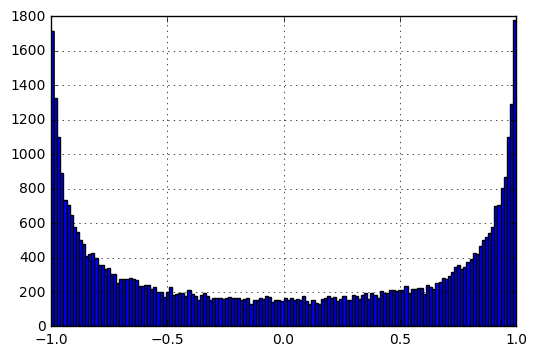

In [262]:
dfs["node_SM"].cos_theta_bb.hist(range=[-1,1],bins=150)
plt.show()

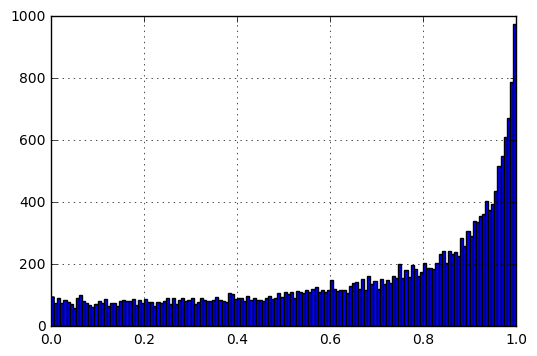

In [261]:
dfs["node_SM"].cos_theta_gg.hist(range=[0,1],bins=150)
plt.show()

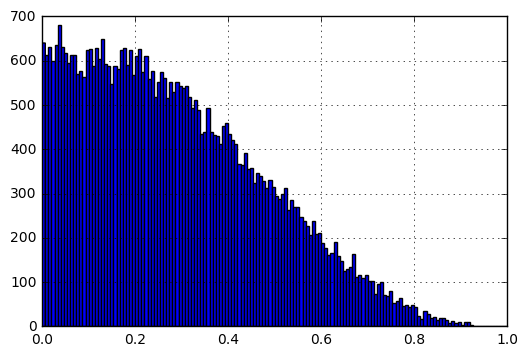

In [259]:
dfs["node_SM"].cos_theta_cs.hist(range=[0,1],bins=150)
plt.show()

In [248]:
#hdf: hierarchial data format

for proc,df in dfs.items():
    df.to_hdf(proc+".hd5",proc,mode="w") #mode w: write

In [249]:
! ls *.hd5

node_10.hd5  node_13.hd5  node_4.hd5  node_7.hd5  node_box.hd5
node_11.hd5  node_2.hd5   node_5.hd5  node_8.hd5  node_SM.hd5
node_12.hd5  node_3.hd5   node_6.hd5  node_9.hd5


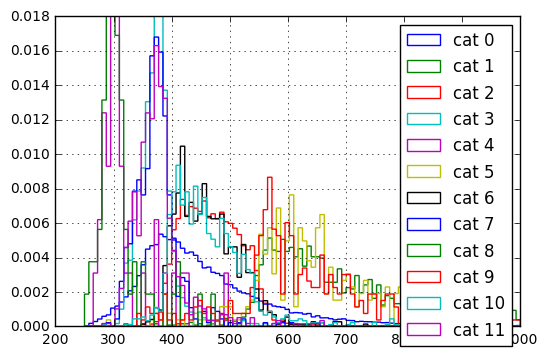

In [250]:
gbycat = dfs["node_SM"].groupby('cat')

for icat in range(12):
    dfc = gbycat.get_group(icat)
    dfc.hh_m.hist(range=[250,1000],bins=100,normed=True,histtype="step",label="cat %d" % icat)  
plt.legend()
plt.show()

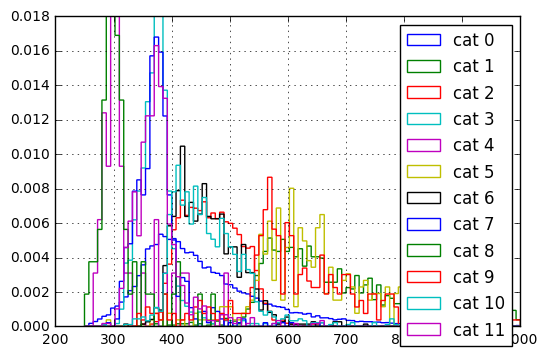

In [253]:
gbycat = dfs["node_SM"].groupby('cat')

for icat in range(12):
    dfc = gbycat.get_group(icat)
    dfc.mtilda_x.hist(range=[250,1000],bins=100,normed=True,histtype="step",label="cat %d" % icat)  
plt.legend()
plt.show()